# 機器學習_分類_決策樹-XGboost 應用於貸款預測
#### 資料來源 參考文件
https://blog.csdn.net/c406495762/article/details/75663451

https://github.com/Jack-Cherish/Machine-Learning/tree/master/Decision%20Tree

https://ithelp.ithome.com.tw/articles/10271143?sc=hot

https://tree.rocks/decision-tree-graphviz-contour-with-pandas-gen-train-test-dataset-for-beginner-9137b7c8416a

https://www.jiqizhixin.com/articles/2020-06-11-6

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

https://ithelp.ithome.com.tw/articles/10271143

https://ithelp.ithome.com.tw/articles/10272586

https://ithelp.ithome.com.tw/articles/10268088

https://ithelp.ithome.com.tw/articles/10268984

https://ithelp.ithome.com.tw/articles/10273094

https://blog.csdn.net/qq_45704645/article/details/109350415

## XGboost(eXtreme Gradient Boosting,極端梯度提升)
### XGboost 與random forest一樣是很多棵樹的算法，random forest是建構出不同的樹，每棵樹互相獨立學習;
### 而XGboost 則是每一棵樹都會根據前一棵樹不足的地方進行改良，也就是每棵樹是相互有關聯的，目標是希望後面生成的樹能夠修正前面一棵樹犯錯的地方(梯度提升)。
### 另外在每次建樹的過程 XGboost 採用所有資料而非部份資料。


## Bagging(套袋) vs. Boosting(提升)
### Bagging 透過抽樣的方式生成樹，每棵樹彼此獨立
### Boosting 透過序列的方式生成樹，後面生成的樹會與前一棵樹相關
### 隨機森林採用 Bagging 的方式。而 XGBoost 就是採用 Boosting 方法


## XGboost 如何判斷生成的樹好壞?
### 主要透過loss function來評斷樹的好壞，這裡用一個分類問題常用的loss function- cross entropy，下圖p是label（實際值），q是prediction（預測值)，基本上若p與q相近，則loss小:
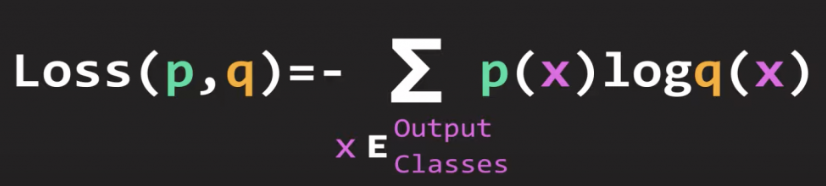

### 當XGboost要新建一棵樹時，會拿新的樹與前一棵樹以loss function做比較，去找出loss降低最多的結構，再依序下去

## 安裝 XGBoost 套件

In [2]:
#
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 812.7 kB/s eta 0:02:03
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.4/99.8 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 0.8/99.8 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.3/99.8 MB 5.8 MB/s eta 0:00:18
    --------------------------------------- 2.3/99.8 MB 8.2 MB/s eta 0:00:12
   - -------------------------------------- 4.1/99.8 MB 12.9 MB/s eta 0:00:08
   - -------------------------------------- 4.1/99.8 MB 12.9 MB/s eta 0:00:08
   --- ----------------------------

## 實作 XGBoost套件 XGBClassifier,以貸款預測做範例
## Parameters:
### n_estimators: 總共迭代的次數，即決策樹的個數。預設值為100。
### max_depth: 樹的最大深度，默認值為6。
### booster: gbtree 樹模型(預設) / gbliner 線性模型
#### gbtree: 這是預設值，表示使用樹模型。樹模型是一種通過不斷切分數據資料來生成複雜模型的機器學習模型。在 XGBoost 中，使用了梯度提升樹（Gradient Boosting Decision Tree，GBDT）算法，通過構建多棵決策樹來逐步提升模型性能。
#### gbliner: 這個參數值表示使用線性模型。線性模型是一種通過線性組合特徵來進行預測的機器學習模型。在 XGBoost 中，線性模型是通過特徵權重的線性組合來進行預測的。
#### 選擇使用樹模型還是線性模型取決於您的數據集特徵和預測目標的性質。通常來說，如果數據集包含複雜的非線性關係，則使用樹模型可能更適合。如果數據集具有線性特徵關係，則可以考慮使用線性模型。
### learning_rate: 學習速率，預設0.3。(訓練模型時，以學習率控制模型的學習進度)
#### learning_rate（學習率）是梯度提升樹算法中的一個重要參數，用於控制每個弱學習器（即每棵樹）對最終模型的貢獻程度。它乘以每棵樹的預測結果來獲得每棵樹的實際貢獻。較小的學習率可以使模型訓練得更穩定，但需要較高的樹數量來達到較好的性能。反之，較大的學習率可以加速收斂，但可能導致過擬合。在調參時，通常會同時調整學習率和樹的數量，以獲得最佳的性能。
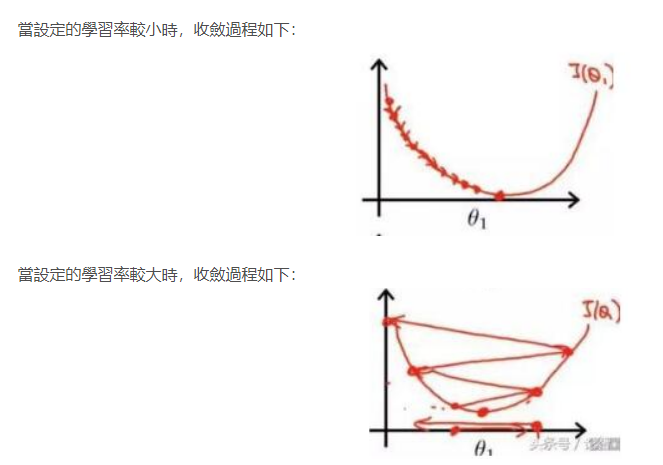
### gamma: 懲罰項係數，指定節點分裂所需的最小損失函數下降值。
#### 在XGBoost中，gamma是一個正則化參數，用於控制樹的葉子節點上所需的最小損失函數下降量，用於使樹的分支更加保守。gamma值越大，算法越保守。它的作用是當樹的分裂節點的損失函數下降值小於gamma時，該節點不再分裂，即節點的分裂停止。這樣可以防止過擬合，提高模型的泛化能力。通常情況下，較大的gamma值可以避免模型學習到局部的特殊樣本，使得模型更加泛化。
## Attributes:
### feature_importances_: 查詢模型特徵的重要程度。
## Methods:
### fit: 放入X、y進行模型擬合。
### predict: 預測並回傳預測類別。
### score: 預測成功的比例。
### predict_proba: 預測每個類別的機率值。

### 以下為程式碼使用範例說明
from xgboost import XGBClassifier

#### 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
#### 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
#### 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

## STEP0: 前置作業:收集數據及準備數據集，收集完的數據，我們要進行整理
### 原始資料集
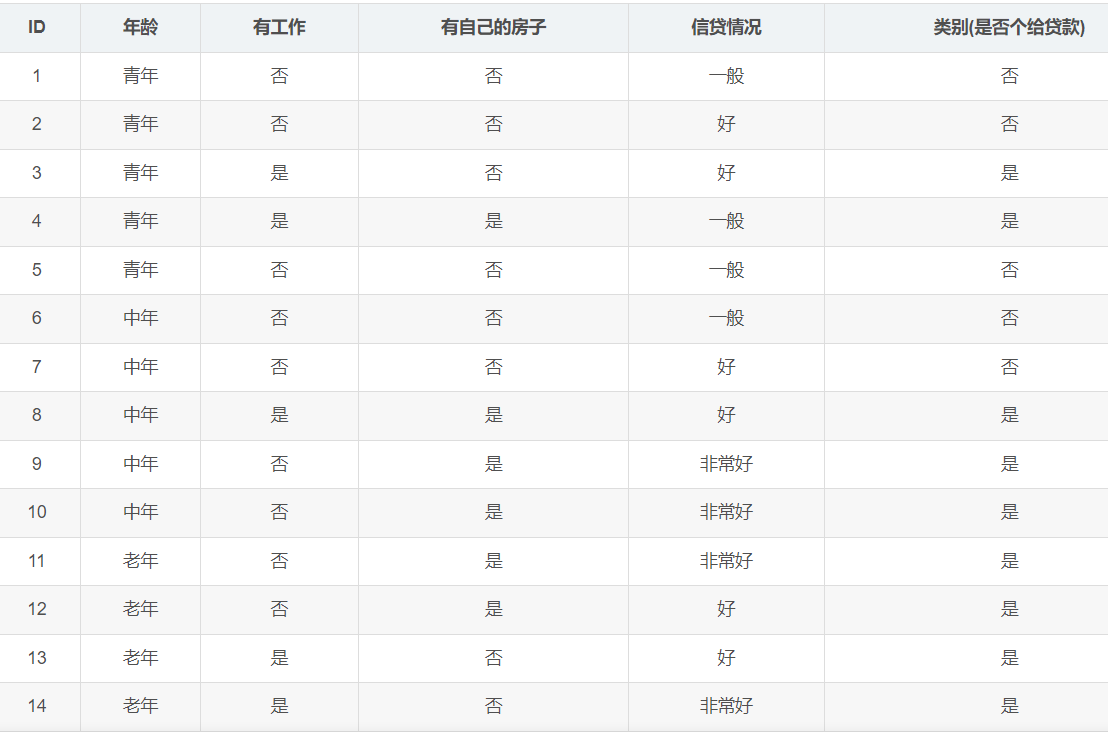

### 準備數據:準備特徵資料及整理資料
### 為方便後續程式處理,先對數據集的資料內容進行數值化標註轉換。
#### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
#### 類別(是否給貸款)：no :0 代表否，yes:1  代表是。


### STEP1 標註資料及建立資料集
#### 直接使用Python的numpy array建構資料集。
#### 建立一個是否貸款類別及對應的特徵資料集

In [1]:
import numpy as np
from xgboost import XGBClassifier

In [2]:
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
loan_data_X =np.array( [[0, 0, 0, 0],						#数据集
			[0, 0, 0, 1],
			[0, 1, 0, 1],
			[0, 1, 1, 0],
			[0, 0, 0, 0],
			[1, 0, 0, 0],
			[1, 0, 0, 1],
			[1, 1, 1, 1],
			[1, 0, 1, 2],
			[1, 0, 1, 2],
			[2, 0, 1, 2],
			[2, 0, 1, 1],
			[2, 1, 0, 1],
			[2, 1, 0, 2],
			[2, 0, 0, 0]])
#
#### 是否放貸款: 0:不放貸,1:放貸
loan_type_y =np.array([0,0,1,1,0,0,0,1,1,1,1,1,1,1,0])
print(loan_data_X.shape,loan_type_y.shape)

(15, 4) (15,)


### STEP2 切割訓練集與測試集

In [3]:
# 使用Scikit-Learn 的 train_test_split() 這個函式來做資料分割
from sklearn.model_selection import train_test_split
#train_test_split(『原始的資料』、『random_state』、『比例』)
#參數
#原始的資料：是我們打算切成 Training data 以及 Test data 的原始資料
#random_state： 亂數種子，可以固定我們切割資料的結果
#比例：可以設定 train_size 或 test_size，只要設定一邊即可，範圍在 [0-1] 之間
X_train, X_test, y_train, y_test = train_test_split(loan_data_X, loan_type_y, test_size=0.2)
print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (12, 4)
test shape: (3, 4)


### STEP3 建構XGboost 模型

In [4]:
from  xgboost import XGBClassifier
# 建立 XGBClassifier 模型
dt = XGBClassifier(n_estimators=5, learning_rate= 0.3)

### STEP4 訓練模型

In [5]:
dt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### STEP5 使用Score,F1-Score評估模型

In [6]:
#使用Score評估模型
# 預測成功的比例
print('訓練集: ',dt.score(X_train,y_train))
print('測試集: ',dt.score(X_test,y_test))

訓練集:  0.9166666666666666
測試集:  0.3333333333333333


In [7]:
#使用F1-Score評估模型
from sklearn.metrics import f1_score
# 預測成功的比例
dt_pred_train = dt.predict(X_train)
print('訓練集 Evaluation F1-Score=>',f1_score(y_train,dt_pred_train))
dt_pred_test = dt.predict(X_test)
print('測試集 Evaluation F1-Score=>',f1_score(y_test,dt_pred_test))

訓練集 Evaluation F1-Score=> 0.9090909090909091
測試集 Evaluation F1-Score=> 0.5


### STEP6 進行預測

In [8]:
# 使用predict預測分類
##### 年齡：用 0 代表青年，1 代表中年，2 代表老年；
#### 有工作：用 0 代表否，1 代表是；
#### 有自己的房子：用 0 代表否，1 代表是；
#### 信貸情況：0 代表一般，1 代表好，2 代表非常好；
new_x =np.array([[0,1,0,2]])
predicted =dt.predict(new_x)
print(predicted)
if(predicted[0]==1):
    print("放貸")
elif(predicted[0]==0):
    print("不放貸")

[0]
不放貸
